/Users/Gorkem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
30108/30108 [==============================] - 1s 48us/step - loss: 0.0259 - mae: 0.1024 - accuracy: 1.3286e-04
Epoch 2/100
30108/30108 [==============================] - 1s 45us/step - loss: 0.0227 - mae: 0.0944 - accuracy: 1.3286e-04
Epoch 3/100
30108/30108 [==============================] - 2s 57us/step - loss: 0.0217 - mae: 0.0924 - accuracy: 1.3286e-04
Epoch 4/100
30108/30108 [==============================] - 2s 55us/step - loss: 0.0223 - mae: 0.0923 - accuracy: 1.3286e-04
Epoch 5/100
30108/30108 [==============================] - 2s 51us/step - loss: 0.0210 - mae: 0.0907 - accuracy: 1.3286e-04
Epoch 6/100
30108/30108 [==============================] - 2s 50us/step - loss: 0.0206 - mae: 0.0903 - accuracy: 1.3286e-04
Epoch 7/100
30108/30108 [==============================] - 1s 42us/step - loss: 0.0205 - mae: 0.0903 - accuracy: 1.3286e-04
Epoch 8/100
30108/30108 [==============================] - 1s 43us/step - loss: 0.0206 - mae: 0.0900 - accuracy: 1.3286e-04
Epoch 9/

30108/30108 [==============================] - 1s 43us/step - loss: 0.0166 - mae: 0.0815 - accuracy: 1.6607e-04
Epoch 65/100
30108/30108 [==============================] - 1s 43us/step - loss: 0.0163 - mae: 0.0809 - accuracy: 1.6607e-04 0s - loss: 0.0161 - mae: 0.0805 - accuracy: 1.81
Epoch 66/100
30108/30108 [==============================] - 1s 42us/step - loss: 0.0163 - mae: 0.0804 - accuracy: 1.6607e-04
Epoch 67/100
30108/30108 [==============================] - 1s 47us/step - loss: 0.0163 - mae: 0.0806 - accuracy: 1.6607e-04
Epoch 68/100
30108/30108 [==============================] - 2s 59us/step - loss: 0.0164 - mae: 0.0806 - accuracy: 1.6607e-04
Epoch 69/100
30108/30108 [==============================] - 1s 47us/step - loss: 0.0162 - mae: 0.0804 - accuracy: 1.6607e-04 0s - loss: 0.0161 - 
Epoch 70/100
30108/30108 [==============================] - 1s 44us/step - loss: 0.0162 - mae: 0.0803 - accuracy: 1.6607e-04 0s - loss: 0.0158 - ma
Epoch 71/100
30108/30108 [===================

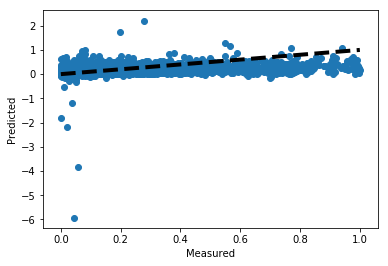

Mean absolute Error Rev: 87814.34425406459
Mean sq Error Rev: 30230228583.54655


In [9]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('non_pltv_raw_nom.csv')
dataset.head(2)

dataset.describe(include='all')


X = dataset.iloc[:, :-1].values # Independent Variables
y = dataset.iloc[:, -1].values   # Dependent Variables

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)  

from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


y_train =y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=212, input_dim=212,activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam',loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

results=regressor.fit(X_train,y_train)

y_pred= regressor.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

import sklearn.metrics as metrics
y_pred=y_pred.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

inv_y_pred = scaler_y.inverse_transform(y_pred) # Rescaling back
inv_y_test = scaler_y.inverse_transform(y_test)
print('Mean absolute Error Rev:', metrics.mean_absolute_error(inv_y_test, inv_y_pred))
print('Mean sq Error Rev:', metrics.mean_squared_error(inv_y_test, inv_y_pred))

In [10]:
print('Mean sq Error Rev:', metrics.mean_squared_error(inv_y_test, inv_y_pred))

Mean sq Error Rev: 30230228583.54655
